<br><br><br><br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; PYTHON\ PROJECT:\ APOLLO\ 13$<br><br><br><br>

                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     
                                                                                                     Evan Shipley
                                                                                                November 21, 2019
                                                                                   Programming: Physical Sciences
                                                                                       Professor Gregory Sullivan
              
              
            "The launch day is Saturday, April 11th, 1970. The planned time of launch 
            is 19:13:00 GMT which, at Kennedy Space Center (KSC), will be 14:13:00 EST.

    Abstract:

            Orbital mechanics, also called flight mechanics, is the study of spacecraft and satellite 
        under the influence of forces such as gravity, atmospheric drag, thrust, etc. This field of
        studies roots are celestial mechanics, the study of the motions of natural celestial bodies such
        as the moon and planets tracing back to the 17th century when Isaac Newton (1642-1727) put forward 
        his laws of motion and formulated his law of universal gravitation. Applications of orbital 
        mechanics include ascent trajectories, reentry and landing, rendezvous computations, and lunar and
        interplanetary trajectories.                                             
        
    Problem Description:
            
            My python project will begin by modeling a three dimensional three body problem. I will draw
    inspiration from previous Matlab projects and from our asteroid impact lab. Starting out, I will 
    use polar coordinates to create an Earth and Moon system in which a spacecraft will be launched from 
    Earth and have it’s trajectory altered much more by the Moon’s gravity to slingshot it back to Earth. 
    This spacecraft’s path will first be modeled using a simple Euler Method in order to most efficiently 
    test the code while working on it. I will add an initial starting position for the spacecraft at the 
    surface of Earth. My next step will be to try to incorporate one or more higher order differential 
    equation solving methods including, Heun’s Method, Runge-Kutta Method, or simply by using python’s 
    ode45. Once I have completed this I will try to animate the movement and graph the closest approaches 
    that the projectile makes with the Moon and Earth. Finally, to make the problem even more interesting 
    I will add the data for the Apollo 13 mission where the spacecraft lost two of its fuel cells. To 
    simulate this I will be adding two points where the velocity will be changed. One in which it will be 
    decreased (the mid course correction they made in preparation to land on the moon before the explosion 
    of the oxygen tanks caused them to lose their fuel cells) and a second where it will be increased. 
    This was to cancel the landing and do a free return trajectory around the moon arriving in a path that 
    is tangent near Earth so that it is captured by the Earth’s gravitational pull and can land safely.

    Procedure:

    I     Create Packages (or just have them neatly at the top of code) for:
            A.  Package for modeling Earth And Moon as 3D surfaces with celestial distances
                  1. Model the Earth at the origin using parametric surface of a sphere
                  2. Model the Moon using the same method, but at it’s distance from Earth 
                     (from NASA sheet) along the x-axis
            B.  Package for calculating position and velocity using the differential equations of
                force and acceleration in a function for use with any ordinary differential equation 
                solving method
    II    Add initial conditions: 
            A.  Earth and Moon mass, (Spacecraft mass is negligible and cancels)
            B.  Universal gravitational constant G = 6.673*10^-11
            C.  Velocity component vectors in polar coordinates
    III   Incorporate first ODE solver (Euler’s Method)
            A.  Plot the Euler positions over time in 3D graph with the Earth and Moon system
    IV    Create a graph of velocity (logarithmic scale) vs absolute distance from Earth
    V     Add outputs to print initial assumptions: radius of earth, radius of Moon, distance from 
          Earth to Moon, mass of Earth, mass of Moon
    VI    Print outputs for: current step in loop (to give hope if execution time is long), time-step 
          (and avg/min/max time steps if time-step changes), total distance traveled, avg distance 
          traveled between time-steps, max/min/avg velocity, time for program to complete
    VII   Add more ODE solving methods
    VIII  Incorporate Apollo 13 mission MCC boost and DPS burn
    IX    If time allows: Call for user input of DPS burn with a few choices that could either rescue 
          the astronauts or put them in imminent danger!


The equations that govern the future motion are from Newton's law and the law of gravity:

$\;\;\;\;\; \vec{F}=m\vec{a}=m\ddot{\vec{r}} \;\;\;\;\; \vec{F}_{Grav} = -\frac{GMm}{r^2}\hat{r}=-\frac{GMm}{r^3}\vec{r}$

where $M$ is Earth's mass, $m$ is spacecraft's mass, $r$ is the distance from Earth's center to the ship, and $G$ is Newton's gravitational constant.

Then, using $\vec{r}=x\hat{i}+y\hat{j}+z\hat{j}$ the vector equations above can be written as:

$\;\;\;\; m(\ddot{x}\hat{i}+\ddot{y}\hat{j}+\ddot{z}\hat{j})=-\frac{GMm}{(x^2+y^2+z^2)^{3/2}}(x\hat{i}+y\hat{j}+z\hat{j})$ 

or canceling the $m$ on both sides and writing the equations for each vector component,

$\;\;\;\; \ddot{x}=-\frac{GM}{(x^2+y^2+z^2)^{3/2}}x$ <br>

$\;\;\;\; \ddot{y}=-\frac{GM}{(x^2+y^2+z^2)^{3/2}}y$ <br>

$\;\;\;\; \ddot{z}=-\frac{GM}{(x^2+y^2+z^2)^{3/2}}z$ <br>

We can break the 2nd oder ODEs into coupled 1st order ODEs. In this case we have 3 coupled 2nd order ODEs to be written as 6 couple 1st order ODEs. Then we implement these in python by using the notation:

$r_1=x$<br>
$r_2=\dot{x} = \dot{r_1}$<br>
$r_3=y$ <br>
$r_4=\dot{y} = \dot{r_3}$<br>
$r_5=z$<br>
$r_6=\dot{z} = \dot{r_5}$<br>

Then the 4 coupled 1st order ODEs are:

$\dot{r_1} = \dot{x}=r_2$ <br>
$\dot{r_2} = \ddot{x} = -\frac{GM_{Earth}}{(x^2+y^2+z^2)^{3/2}}x -\frac{GM_{Moon}}{((x-d_{Moon})^2+y^2+z^2)^{3/2}}(x-d_{Moon})= -\frac{GM}{(x^2+y^2+z^2)^{3/2}}r_1 -\frac{GM}{((x-d_{Moon})^2+y^2+z^2)^{3/2}}(r_1-d_{Moon})$<br>
$\dot{r_3} = \dot{y}=r_4$<br>
$\dot{r_4} = \ddot{y} = -\frac{GM}{(x^2+y^2+z^2)^{3/2}}y -\frac{GM_{Moon}}{((x-d_{Moon})^2+y^2+z^2)^{3/2}}y = -\frac{GM}{(x^2+y^2+z^2)^{3/2}}r_3 -\frac{GM}{((x-d_{Moon})^2+y^2+z^2)^{3/2}}r_3$<br>
$\dot{r_5} = \dot{z}=r_6$<br>
$\dot{r_6} = \ddot{z} = -\frac{GM}{(x^2+y^2+z^2)^{3/2}}z -\frac{GM_{Moon}}{((x-d_{Moon})^2+y^2+z^2)^{3/2}}z= -\frac{GM}{(x^2+y^2+z^2)^{3/2}}r_5 -\frac{GM}{((x-d_{Moon})^2+y^2+z^2)^{3/2}}r_5$<br>

Putting this in array form for use with odeint in python:

$\;\;\;\; \mathbf{r}= \left[ \begin{array}{c} r_1 \\ r_2 \\r_3 \\r_4 \\r_5 \\r_6 \end{array} \right]
\;\;\;\;\;\;\;\; \frac{d\mathbf{r}}{dt} = \left[ \begin{array}{c} r_2 \\ -\frac{GM_{Earth}}{(r_1^2+r_3^2+r_5^2)^{3/2}}r_1-\frac{GM_{Moon}}{((r_1-d_{Moon})^2+r_3^2+r_5^2)^{3/2}}(r_1-d_{Moon}) \\ r_4 \\ -\frac{GM_{Earth}}{(r_1^2+r_3^2+r_5^2)^{3/2}}r_3 -\frac{GM_{Moon}}{((r_1-d_{Moon})^2+r_3^2+r_5^2)^{3/2}}r_3 \\ r_6 \\ -\frac{GM_{Earth}}{(r_1^2+r_3^2+r_5^2)^{3/2}}r_5 \frac{GM_{Moon}}{((r_1-d_{Moon})^2+r_3^2+r_5^2)^{3/2}}r_5 
\end{array} \right]$

In [102]:
print('\033[1m' + 'Apollo 13 Revisted - 40th Anniversary')
from IPython.display import HTML, IFrame
#HTML('<IFrame width="560" height="315" src="https://www.youtube.com/embed/KUAo_T__J2A" frameborder="0.5" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></IFrame>') #old way to embed youtube video into python
IFrame(src="https://www.youtube.com/embed/KUAo_T__J2A",width=560, height=315)
# Apollo 13 Simulation 40th Anniversary 
# Video credit: AGI (An Ansys Company) and Andrew Chaikan

Apollo 13 Revisted - 40th Anniversary


    In orbital mechanics it is common to perform a maneuver called a Hohmann (/ˈhoʊmən/) transfer which is "an 
    elliptical orbit used to transfer between two circular orbits of different radii around a central body in the 
    same plane. The Hohmann transfer often uses the lowest possible amount of propellant in traveling between 
    these orbits, but bi-elliptic transfers can beat it in some cases."
    
    A Hohmann transfer orbit to an outer planet, such as Mars, is achieved by launching a spacecraft and
    accelerating it in the direction of Earth's revolution around the sun until it breaks free of the Earth's
    gravity and reaches a velocity which places it in a sun orbit with an aphelion equal to the orbit of the 
    outer planet. Upon reaching its destination, the spacecraft must decelerate so that the planet's gravity 
    can capture it into a planetary orbit.

In [86]:
print('\033[1m' + 'GIF of Hohmann transfer from Earth to Mars')
HTML('<img crossorigin="anonymous" src="https://upload.wikimedia.org/wikipedia/commons/4/4d/Animation_of_InSight_trajectory.gif" class="gif" alt="" style="">')

GIF of Hohmann transfer from Earth to Mars


In [89]:
from IPython.display import Image
from IPython.core.display import HTML 

print('\033[1m'+'Picture from the Apollo 13 flight log depicting a Hohmann transfer to the Moon')
Image(url= "https://history.nasa.gov/afj/ap13fj/pics/hohmann02.png")

Picture from the Apollo 13 flight log depicting a Hohmann transfer to the Moon


##### Excert from the log regarding the Translunar Injection (Hohmann transfer) plan for the astronauts to land on the moon.

    Day 1, part 2: Earth Orbit and Translunar Injection
    The burn again scheduled to begin at 2 hours, 35 minutes, 44 seconds. The predicted duration of the burn is 5 
    minutes, 47 seconds and we expect that the spacecraft and S-IVB will accelerate some 10,417 feet per second 
    [3,175 m/s] as a result of that maneuver

    002:46:19 Haise: Okay, Joe. The DSKY read 35560, plus 04445, plus 01769, and Delta-VC was minus 3.0.
    Fred Haise now reads the values that were frozen on the display earlier on. Their velocity is 35,560 feet per 
    second or 10,838.68 metres per second. The EMS counter is used to display the residual velocity left to be 
    gained, a mere 3 fps, or 1 m/s.

In [90]:
print('\033[1m'+'Timing to meet with the Moon')
Image(url= "https://history.nasa.gov/afj/ap13fj/pics/lunartrajectory013.png")

Timing to meet with the Moon


In [91]:
print('\033[1m'+'"Mission Profile"')
Image(url= "https://history.nasa.gov/afj/ap13fj/pics/premission-trajectory.png")

"Mission Profile"


In [100]:
print('\033[1m' + "Apollo 13: Houston, We've Got a Problem")
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/CKgaKD3uNog?start=71",width=560, height=315)
# NASA video on Apollo 13
# Video credit: NASA STI Program

Apollo 13: Houston, We've Got a Problem


    My code simulates a flight path that is not optimized other than by trial and error. I do not follow any 
    guidelines for determining a trajectory that would require the least amount of fuel. I simply chose a 
    velocity that was slightly higher than the Apollo 13's velocity at the translunar injection, 10,838.68 m/s.


$\;\;\;\;\;\;\;\; v_i = 11,080\ m/s $ <br>


    This allows the spacecraft to escape Earth and travel toward the Moon initially at the position at the top of
    Earth (ri=<0,0,Earth_Radius> with initial angles of 3 degrees above the EarthMoon-axis in the xy-plane, 
    and 45 degrees from the vertical in the xz-plane.

    Simulated changes in velocity:

        Mid-Course Correction 2 (MCC-2) #MCC in code
        This was a planned boost, occuring 15 hours BEFORE the explosion, that slowed down
        the spacecraft in preparation for lunar orbit.  After this boost occurred, the
        spacecraft was no longer on a free-return trajectory. 
    
$\;\;\;\;\;\;\;\; MCC\ \ \ \Delta v= -5\ m/s $<br> 
    
        Mid-Course Correction 4 (DPS-1) #DPS in code
        This boost occured 5.5 hours AFTER the explosion, returning the spacecraft
        to a free-return trajectory.
    
$\;\;\;\;\;\;\;\; DPS\ \ \ \ \Delta v\ (m/s)= Find\ this\ value\ to\ save\ the\ astronauts\ $<br>     
    
    I added a point near the moon in which the velocity can be instantanesously changed:


$\;\;\;\;\;\;\;\; Hohmann\ \ \ \Delta v= 0 $<br> 


    Near the Earth the spacecraft is slowed and returns to a low circular orbit for landing:


$\;\;\;\;\;\;\;\; Land$_$dv\ \ \ \Delta v=-600.$ <br>

    Although the code is over one hundred lines and generates several three dimensional shapes it runs in 
    milliseconds for me compared to some things that have much fewer lines that take longer to run. Having 
    more time to work on this I might add user inputs, make the trajectory just like the 40 year anniversary 
    video, and create plots and statistical calculations like we did in the asteroid impact lab project. My next 
    task will be to simulate the motion of the Moon before starting on anything else on this project. Adding 
    the Sun and finding ways to reduce the number of lines of code would also be interesting and helpful in 
    better understanding orbital mechanics and the python programming language.

Handmade MCC-2 geometry drawing, from the Flight Director's Log.


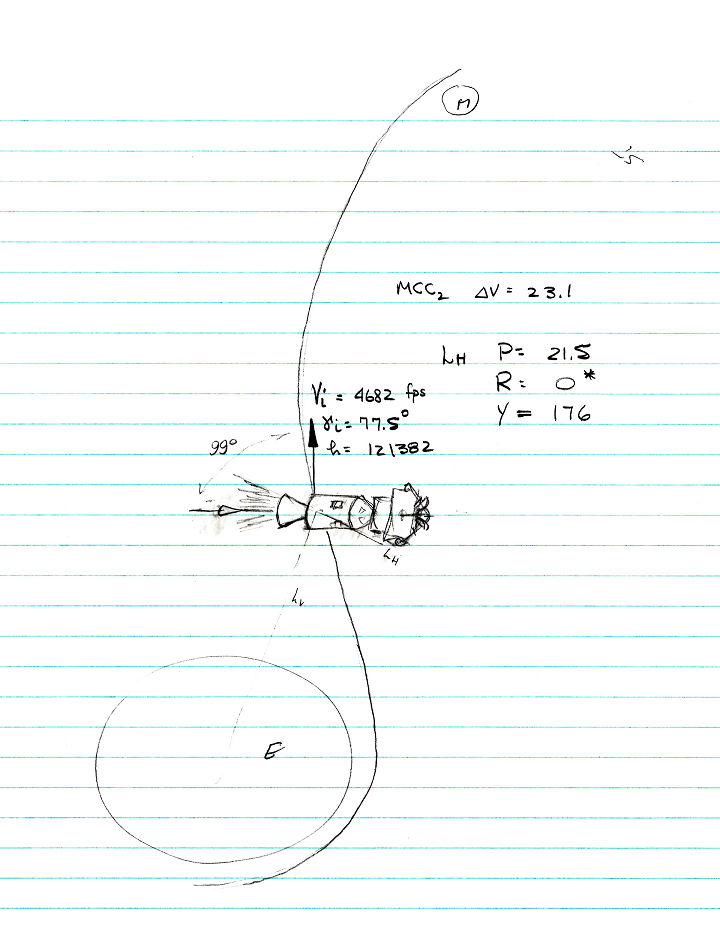

In [103]:
print('\033[1m'+'Handmade MCC-2 geometry drawing, from the Flight Director\'s Log.')
Image("https://history.nasa.gov/afj/ap13fj/pics/mcc2-geometry.png")

In [85]:
'''Run the following code for popout figures, and the next cell for a colorful one. '''

import numpy as np
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import pyplot as plt
from scipy.integrate import odeint

from numpy import linalg as LA

#Given Celestial Parameters
Me=5.972*10**24; #Mass of Earth, kg
Re=6.3781*10**6; #Radius of Earth
d = 384.4*10**6; #distance of center of Earth to center of Moon
m_Moon  = 7.348*10**22; # mass of moon, kg
r_Moon = 1.737*10**6; # radius of moon, meters
G=6.67384*10**-11; #Universal gravitational constant
#Independent Variables
phi_i = 45*np.pi/180 #Angle from the xy-plane to the z-axis, degrees
theta_i = 5*np.pi/180 #Angle from the positive x-axis to the y-axis, degrees
#h = 1; #Size of the time-step, seconds


# 1st graph
# Model of the Earth and Moon
theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
xE = Re * np.sin(PHI) * np.cos(THETA)
yE = Re * np.sin(PHI) * np.sin(THETA)
zE = Re * np.cos(PHI)
xM = r_Moon * np.sin(PHI) * np.cos(THETA)
yM = r_Moon * np.sin(PHI) * np.sin(THETA)
zM = r_Moon * np.cos(PHI)
xM = xM+d

fig = plt.figure("Houston We've Got A Problem",figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='3d')
plotE = ax.plot_surface(
    xE, yE, zE, rstride=1, cstride=1, cmap=plt.get_cmap('winter_r'),
    linewidth=0, antialiased=False, alpha=0.5)
plotM = ax.plot_surface(
    xM, yM, zM, rstride=1, cstride=1, cmap=plt.get_cmap('ocean'),
    linewidth=0, antialiased=False, alpha=0.5)

Xax = np.linspace(-Re,xM+Re,100)
Yax = np.linspace(-Re,Re,100)
Zax = np.linspace(-Re,Re,100)
max_range = np.array([Xax.max()-Xax.min(), Yax.max()-Yax.min(), Zax.max()-Zax.min()]).max() / 2.0
mid_x = (Xax.max()+Xax.min()) * 0.5
mid_y = (Yax.max()+Yax.min()) * 0.5
mid_z = (Zax.max()+Zax.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Turning the initial velocity vector of the projectile into components
vtotal=11080
vx = vtotal*np.cos(phi_i) * np.cos(theta_i) # meters/seconds
vy = vtotal*np.cos(phi_i) * np.sin(theta_i) # meters/seconds
vz = vtotal*np.sin(phi_i) # meters/seconds
#v = [vx,vy,vz] # meters/seconds

def F(r,t):
    dr = [0,0,0,0,0,0]
    dr[0]=r[1]
    dr[1]= -G*Me*r[0]/(r[0]**2+r[2]**2+r[4]**2)**(3/2)-(r[0]-d)*G*m_Moon/(
        (r[0]-d)**2+r[2]**2+r[4]**2)**(3/2)
    dr[2]=r[3]
    dr[3]= -G*Me*r[2]/(r[0]**2+r[2]**2+r[4]**2)**(3/2)-r[2]*G*m_Moon/(
        (r[0]-d)**2+r[2]**2+r[4]**2)**(3/2)
    dr[4]=r[5]
    dr[5]= -G*Me*r[4]/(r[0]**2+r[2]**2+r[4]**2)**(3/2)-r[4]*G*m_Moon/(
        (r[0]-d)**2+r[2]**2+r[4]**2)**(3/2)
    return dr

t_launch=np.arange(0,5*10**4,100)
t_mcc1=np.arange(5*10**4,1*10**5,200)
t_dps=np.arange(1*10**5,3*10**5,100)
t_hohmann=np.arange(3*10**5,6*10**5,200)
t_return=np.arange(6*10**5,7.385*10**5,300)
tf=7.9*10**5
t_land=np.arange(7.385*10**5,tf,300)

#changes in linear velocity of spaceraft
MCCboost=-5
DPSboost=15
Hohmann=0
Land_dv=-1100

#parametrizations of initial trajectory using scipy's ODE solver
rE = [0,0,Re]
r0=[rE[0],vx,rE[1],vy,rE[2],vz]
r=odeint(F,r0,t_launch)

#re-defining velocities, marking positions, and parameterizing new trajectory
velocity=[r[-1,1],r[-1,3],r[-1,5]] #components of velocity at time of first course correction
vx_MCC=(LA.norm(velocity)+MCCboost)*r[-1,1]/LA.norm(velocity)
vy_MCC=(LA.norm(velocity)+MCCboost)*r[-1,3]/LA.norm(velocity)
vz_MCC=(LA.norm(velocity)+MCCboost)*r[-1,5]/LA.norm(velocity)

ax.scatter(r[-1,0],r[-1,2],r[-1,4],marker=">",label='Mid-Course Correction')
MCC=r[-1,0],r[-1,2],r[-1,4]
r_mcc1=[r[-1,0],vx_MCC,r[-1,2],vy_MCC,r[-1,4],vz_MCC]
r2=odeint(F,r_mcc1,t_mcc1)

velocity_DPS=[r2[-1,1],r2[-1,3],r2[-1,5]]
vx_DPS=(LA.norm(velocity_DPS)+DPSboost)*r2[-1,1]/LA.norm(velocity_DPS)
vy_DPS=(LA.norm(velocity_DPS)+DPSboost)*r2[-1,3]/LA.norm(velocity_DPS)
vz_DPS=(LA.norm(velocity_DPS)+DPSboost)*r2[-1,5]/LA.norm(velocity_DPS)

ax.scatter(r2[-1,0],r2[-1,2],r2[-1,4],marker=">",label='DPS-Boost')
DPS=r2[-1,0],r2[-1,2],r2[-1,4]
r_dps=[r2[-1,0],vx_DPS,r2[-1,2],vy_DPS,r2[-1,4],vz_DPS]
r3=odeint(F,r_dps,t_dps)
 
velocity_H=[r3[-1,1],r3[-1,3],r3[-1,5]]
vx_H=(LA.norm(velocity_H)+Hohmann)*r3[-1,1]/LA.norm(velocity_H)
vy_H=(LA.norm(velocity_H)+Hohmann)*r3[-1,3]/LA.norm(velocity_H)
vz_H=(LA.norm(velocity_H)+Hohmann)*r3[-1,5]/LA.norm(velocity_H)

ax.scatter(r3[-1,0],r3[-1,2],r3[-1,4],marker="^",label='Moon Approach')
hohm=r3[-1,0],r3[-1,2],r3[-1,4]
r_hohmann=[r3[-1,0],vx_H,r3[-1,2],vy_H,r3[-1,4],vz_H]
r4=odeint(F,r_hohmann,t_hohmann)

r_return=[r4[-1,0],r4[-1,1],r4[-1,2],r4[-1,3],r4[-1,4],r4[-1,5]]
r5=odeint(F,r_return,t_return)

velocity_L=[r5[-1,1],r5[-1,3],r5[-1,5]]
vx_L=(LA.norm(velocity_L)+Land_dv)*r5[-1,1]/LA.norm(velocity_L)
vy_L=(LA.norm(velocity_L)+Land_dv)*r5[-1,3]/LA.norm(velocity_L)
vz_L=(LA.norm(velocity_L)+Land_dv)*r5[-1,5]/LA.norm(velocity_L)

ax.scatter(r5[-1,0],r5[-1,2],r5[-1,4],marker=".",label='Earth Landing')
land=r5[-1,0],r5[-1,2],r5[-1,4]
r_land=[r5[-1,0],vx_L,r5[-1,2],vy_L,r5[-1,4],vz_L]
r6=odeint(F,r_land,t_land)

#defining trajectory as one continuous line in space
Xd,Yd,Zd=np.append(r[:,0],r2[:,0]),np.append(r[:,2],r2[:,2]),np.append(r[:,4],r2[:,4]) #from Earth to start of DPS
X,Y,Z=np.append(Xd,r3[:,0]),np.append(Yd,r3[:,2]),np.append(Zd,r3[:,4]) #from Earth to start of Hohhman
X,Y,Z=np.append(X,r4[:,0]),np.append(Y,r4[:,2]),np.append(Z,r4[:,4])  #from Earth to start of return (no marker)
X,Y,Z=np.append(X,r5[:,0]),np.append(Y,r5[:,2]),np.append(Z,r5[:,4])  #from Earth to start of Land
Xt,Yt,Zt=np.append(X,r6[:,0]),np.append(Y,r6[:,2]),np.append(Z,r6[:,4]) #Full Trajectory

#X,Y,Z=[r[:,0],r[:,2],r[:,4]] #initial trajectory

def time_func(func, *args): #*args can take 0 or more 
  import time
  start_time = time.time()
  func(*args)
  end_time = time.time()
  print("it took {:.8f} s to complete the path graph:".format(end_time-start_time))

#path = ax.plot(X, Y, Z, lw=2, color='c')
time_func(ax.plot,Xt, Yt, Zt,'c')
plt.title(r'$Spaceship^{\prime}s$ $Path$')
plt.legend(prop={'size': 6});

vx,vy,vz=np.append(r[:,1],r2[:,1]),np.append(r[:,3],r2[:,3]),np.append(r[:,5],r2[:,5]) # velocity until DPS
vx,vy,vz=np.append(vx,r3[:,1]),np.append(vy,r3[:,3]),np.append(vz,r3[:,5]) # velocity up to Moon Approach
vx,vy,vz=np.append(vx,r4[:,1]),np.append(vy,r4[:,3]),np.append(vz,r4[:,5]) # velocity up to return
vx,vy,vz=np.append(vx,r5[:,1]),np.append(vy,r5[:,3]),np.append(vz,r5[:,5]) # velocity up to land
vt,vt,vt=np.append(vx,r6[:,1]),np.append(vy,r6[:,3]),np.append(vz,r6[:,5]) # velocity up to time_final (tf)
vnorm = np.sqrt(vx**2+vy**2+vz**2); # array of absolute velocities, m/s (before landing)
rEnorm= np.sqrt(X**2+Y**2+Z**2); # array of absolute positions, m (before landing)

fig2=plt.figure()
ax1 = fig2.add_subplot(1,1,1)
plt.semilogy(rEnorm,vnorm,color='c') # logarithric plot
plt.title(r'$Absolute\ Distance\ from\ the\ Earth\ vs.\ Velocity$');
MCC_x=LA.norm(MCC)
MCC_y=LA.norm(velocity)
DPS_x=LA.norm(DPS)
DPS_y=LA.norm(velocity_DPS)
hohm_x=LA.norm(hohm)
hohm_y=LA.norm(velocity_H)
landing_x=LA.norm(land)
landing_y=LA.norm(velocity_L)
plt.plot(MCC_x,MCC_y-120,marker="^",label='Mid-Course Correction')
plt.plot(DPS_x,DPS_y-70,marker="^",label='DPS-Boost')
plt.plot(hohm_x,hohm_y,marker=">",label='Moon Approach')
plt.plot(landing_x,landing_y,marker=".",label='Earth Landing')
plt.xlabel(r'$Distance\ (\mathcal{m}$)')
plt.ylabel(r'$Velocity\ (\mathcal{m}$)')
plt.legend(prop={'size': 6})

mngr = plt.get_current_fig_manager()
mngr.window.setGeometry(200,500,600, 500)


'''Working on forcing user input to change the velocity to get onto a free return trajectory. 
Next, re-defining the components of velocity from a small random fluctuation in the angle phi 
of the spacecrafts trajectory. Finally, performing simulations to test for crashing into Earth 
or flying off into space. I think I have the crash testing completed near the end for any changes
made to velocity in the code'''
N_trials=np.arange(0,100); #Total number of iterations
phi_sig=0.75*np.pi/180

beta=theta

user_input=15
vel_DPS=user_input
vx_DPSin=(LA.norm(vel_DPS)+DPSboost)*r2[-1,1]/LA.norm(vel_DPS)
vy_DPSin=(LA.norm(vel_DPS)+DPSboost)*r2[-1,3]/LA.norm(vel_DPS)
vz_DPSin=(LA.norm(vel_DPS)+DPSboost)*r2[-1,5]/LA.norm(vel_DPS)

#phi2=1/(np.sin(vz_DPSin/vel_DPS+np.random.randn(np.size(N_trials))*phi_sig))
#theta2=1/np.cos(vx_DPSin/(1/(vel_DPS)*(np.cos(phi2))))
phi2=np.arccos(vz_DPSin/np.sqrt(vx_DPSin**2+vy_DPSin**2+vz_DPSin**2))
theta2=np.tan(vy_DPSin/vx_DPSin)

v_x=vel_DPS*np.cos(theta2)*np.cos(phi2)
v_y=vel_DPS*np.sin(theta2)*np.cos(phi2)
v_z=vel_DPS*np.sin(phi2)

t_cutoff=np.arange(3*10**5,8*10**5,500)
impacts=0

rx,ry,rz=r2[-1,0],r2[-1,2],r2[-1,4]

def proper_round(num, dec=0):
    num = str(num)[:str(num).index('.')+dec+2]
    if num[-1]>='5':
        return float(num[:-2-(not dec)]+str(int(num[-2-(not dec)])+1))
    return float(num[:-1])

'''
for i in N_trials:
    if (i%100) == 0:
        print(i,'trials')   
    r_DPS=[rx,v_x,ry,v_y,rz,v_z]
    r_f=odeint(F,r_DPS,t_cutoff)
    d=np.sqrt((r_f[:,0])**2+(r_f[:,2])**2+(r_f[:,4])**2)
    hit=False
    j=0
    while (not hit) and (j<np.size(t_cutoff)):
        if d[j] <= Re:
            #impact = np.append(impact,N_trials[i])
            impacts += 1
            #t_hr=proper_round(t_cutoff[j]*3600)
            #t_min=proper_round((t_cutoff[j]*3600-t_hr)/60)
            #t_sec=proper_round((((t_cutoff[j]*3600-t_hr)/60)-t_min)/60)
            #t_impact[i]=[t_hr,t_min,t_sec]




i=[0]'''

#from DPS Burn to end of simulation time for user input
Xhome,Yhome,Zhome=np.delete(Xt,np.s_[:749]),np.delete(Xt,np.s_[:749]),np.delete(Xt,np.s_[:749])
d=np.sqrt((Xhome)**2+(Yhome)**2+(Zhome)**2)
vnorm_tot= np.sqrt(vt**2+vt**2+vt**2); # all absolute velocities, m/s

rEnorm_tot= np.sqrt(Xt**2+Yt**2+Zt**2); # all absolute positions, m
diff = np.diff(rEnorm) # this calculates r(t + dt) - r(t)
diff_sq = np.sqrt(np.diff(Xt)**2+np.diff(Yt)**2+np.diff(Zt)**2)
MSD = np.mean(diff_sq)
dtotL=np.sum(np.abs(diff)) # total distance traveled before landing start time
dtot=np.sum(np.abs(np.diff(rEnorm_tot))) # total distance traveled until final time
v_avg = dtotL/(7.385*10**5) # average velocity during flight up to final burn to land
vavg = dtot/tf # average velocity during entire flight

vxM,vyM,vzM=r4[:,1],r4[:,3],r4[:,5]
vxR,vyR,vzR=r5[:,1],r5[:,3],r5[:,5]
vxL,vyL,vzL=r5[:,1],r5[:,3],r5[:,5]
vmax_moon=np.max(np.sqrt(vxM**2+vyM**2+vzM**2))
vmax_return=np.max(np.sqrt(vxR**2+vyR**2+vzR**2))
vmax_land=np.max(np.sqrt(vxL**2+vyL**2+vzL**2))


t_impact=np.zeros(np.size(t_cutoff))
impacts=0
hit=False
k=0

#Checks all absolute values of distance to determine if on collision course
N_checks=np.arange(0,np.size(d))
for i in N_checks:
    if (i%np.size(N_checks)) == 0:
        print('Done\n')
    #r_DPS=[rx,v_x,ry,v_y,rz,v_z]
    #r_f=odeint(F,r_DPS,t_cutoff)
    hit=False
    j=0
while (not hit) and (k<np.size(t_cutoff)):
    if d[k]<=Re:
        impacts += 1
        t_impact[i]=t_cutoff[j]
        t_hr=proper_round(t_cutoff[j]*3600)
        t_min=proper_round((t_cutoff[j]*3600-t_hr)/60)
        t_sec=proper_round((((t_cutoff[j]*3600-t_hr)/60)-t_min)/60)
        t_impact[i]=[t_hr,t_min,t_sec]
        print("You crashed into Earth")
        hit=True
    else: 
        k += 1 
print('{      Celestial Distances        }')
print('{  Radius of Earth = 6.3781x10^6  }')
print('{  Radius of Moon = 1.737*10**6   }')
print('{  Distance to Moon = 384.4*10**6 }\n')
if impacts >=1:
    print("Impact At Index",', '.join(map(str,np.nonzero(t_impact))))
    print("Time Of Flight: {:.2f} hr, {:.2f} min, {:.2f} sec\n".format(t_hr,t_min))

print("Average Velocity: {:.2f}\n ".format(vavg))
print("Average Velocity of Flight Before Landing Burn: {:.2f}\n ".format(v_avg))
print("Total Distance Traveled: {:.2e}\n ".format(dtot))
print("Total Distance Traveled Before Landing Burn: {:.2e}\n ".format(dtotL))
D=2*384.4*10**6
print("Still working out this mistake...\n That is the total distance to the point \"Earth Landing\" should be over twice the distance to the Moon...\n ")
print("Twice distance to Moon: {:.3e}\n ".format(D))

plt.show()
#print("Closest approach = <{:.2f} m,{:.2f} m,{:.2f}> m".format(r5[-1,0],r5[-1,2],r5[-1,4]))
#else:
    #print("Closest approach = <{:.2f} m,{:.2f} m,{:.2f}> m".format(r5[-1,0],r5[-1,2],r5[-1,4]))

#ax.axis('off'); #enable to remove plot background of Spaceship's Path'''

it took 0.00050044 s to complete the path graph:
Done

{      Celestial Distances        }
{  Radius of Earth = 6.3781x10^6  }
{  Radius of Moon = 1.737*10**6   }
{  Distance to Moon = 384.4*10**6 }

Average Velocity: 1084.23
 
Average Velocity of Flight Before Landing Burn: 1037.18
 
Total Distance Traveled: 8.57e+08
 
Total Distance Traveled Before Landing Burn: 7.66e+08
 
Still working out this mistake...
 That is the total distance to the point "Earth Landing" should be over twice the distance to the Moon...
 
Twice distance to Moon: 7.688e+08
 


In [ ]:
np.sqrt(r4[0,1]**2+r4[0,3]**2+r4[0,5]**2)

In [ ]:
MSD

In [ ]:
def check(list1, val): 
      
    # traverse in the list 
    for x in list1: 
        
        # compare with all the values 
        # with val 
        if val>= x:
            return False
    x=i
    #a=np.append(a,x)
    return True


In [ ]:
if hasattr(rx, "__iter__")>=0:
    print('true')
else:
    print('false')


In [ ]:
'''Colorful Trajectory (Higher latency when rotating plot)'''

from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

fig = plt.figure("Houston We've Got A Problem",figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='3d')
plotE = ax.plot_surface(
    xE, yE, zE, rstride=1, cstride=1, cmap=plt.get_cmap('winter_r'),
    linewidth=0, antialiased=False, alpha=0.5)
plotM = ax.plot_surface(
    xM, yM, zM, rstride=1, cstride=1, cmap=plt.get_cmap('ocean'),
    linewidth=0, antialiased=False, alpha=0.5)

Xax = np.linspace(-Re,xM+Re,100)
Yax = np.linspace(-Re,Re,100)
Zax = np.linspace(-Re,Re,100)
max_range = np.array([Xax.max()-Xax.min(), Yax.max()-Yax.min(), Zax.max()-Zax.min()]).max() / 2.0
mid_x = (Xax.max()+Xax.min()) * 0.5
mid_y = (Yax.max()+Yax.min()) * 0.5
mid_z = (Zax.max()+Zax.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

#Define Points From Spacecraft Trajectory
points = np.array([Xt, Yt, Zt]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the 3D-line collection object
lc = Line3DCollection(segments, cmap=plt.get_cmap('hsv'))
lc.set_array(Z) 
lc.set_linewidth(2)

#plot
#ax.add_collection3d(lc, zs=Z, zdir='Z')
#plot significant positions


plt.title(r'$Spaceship^{\prime}s$ $Path$')
ax.scatter(r[-1,0],r[-1,2],r[-1,4],marker=">",label='Mid Course Correction')
ax.scatter(r2[-1,0],r2[-1,2],r2[-1,4],marker=">",label='DPS Boost')
ax.scatter(r3[-1,0],r3[-1,2],r3[-1,4],marker="<",label='Moon Approach')
start_land=ax.scatter(r5[-1,0],r5[-1,2],r5[-1,4],marker=".",label='Earth Landing')
plt.legend()
plt.legend(prop={'size': 6});

time_func(ax.add_collection3d,lc, Z)


In [ ]:
'''This code animated the trajectory. However, it no longer works in the latest version of Jupyter NB. 
Installing ffmpeg should allow the code to work, but it is a process, see:
https://suryadayn.medium.com/error-requested-moviewriter-ffmpeg-not-available-easy-fix-9d1890a487d3. 
Also, because of the long execution time, I was forced to set it to animate only the initial trajectory. 
Even with the full parametrization of the trajectory (X,X,Z), instead of being set to r[:0],r[:2],r[:4] 
(the path until the MCC), it would only animate the same amount of the line because it takes more frames 
to animate more of the line).

I will work on a way to reduce the data points, decreasing the intervals, and hopefully speeding up the run-time'''

from matplotlib import animation
from IPython.display import HTML

line, = ax.plot([], [], [], lw=2)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def animate(i, line, X, Y, Z):
    line.set_data(X[:i], Y[:i])
    line.set_3d_properties(Z[:i])
    return line,


anim = animation.FuncAnimation(fig, animate, init_func=init, fargs=(line,r[:,0],r[:,2],r[:,4]),
                           frames=120, interval=50,
                           repeat_delay=5, blit=True)


HTML(anim.to_html5_video())


In [ ]:
'''Reference to eventually incorporate more methods of determining the flight path'''

N_trials=np.arange(0,N)
for i in N_trials:
    # Helps one not give up hope in reaching the end of the loop
    if i == N/2:
        disp('You have reached the half-way point in the loop. Thank you for your patience.')

    
    # Runge-Kutta Method Method Executed
    
    # New velocity vector
    m1 = acceleration(rE[i,:]);
    m2 = acceleration(rE[i,:] + h/2.*m1);
    m3 = acceleration(rE[i,:] + h/2.*m2);
    m4 = acceleration(rE[i,:] + h*m3);
    v[i+1,:] = v[i,:]+h*(m1/6+m2/3+m3/3+m4/6); # m/s
    
    # New position vector
    m1 = v[i,:];
    m2 = v[i,:] + h/2.*m1;
    m3 = v[i,:] + h/2.*m2;
    m4 = v[i,:] + h*m3;
    rE[i+1,:] = rE[i,:]+h*(m1/6+m2/3+m3/3+m4/6); # distance vector from the earth, m
    
    # Comparison using Euler's Method
    v_Euler[i+1,:] = v_Euler[i,:]+h*(-rE_Euler[i,:]*G*m_Earth/(norm(rE_Euler[i,:])**3)-(rE_Euler[i,:]-[d,0,0])*G*m_Moon/(norm(rE_Euler[i,:]-[d,0,0])**3)) # m/s
    rE_Euler[i+1,:]= rE_Euler[i,:]+h*v_Euler[i,:]; # distance vector from the earth, m
end

#v[2:N+1,3] = np.zeros;
#rE[2:N+1,3] = np.zeros;
# Comparison using Euler's Method - creating an initial velocity vector & empty matrices
#v_Euler = [vx,vy,vz]; # m/s
#v_Euler[2:N+1,3] = zeros;

#rE_Euler = [0,0,Re]; # meters
#rE_Euler[2:N+1,3] = zeros;
# Classical 4th Order Runge-Kutta Method Loop
#acceleration = @(rE) -(rE.*G.*m_Earth./(norm(rE).^3))-((rE-[d,0,0]).*G.*m_Moon./(norm(rE-[d,0,0]).^3)); # m/s^2

#### Excerpt from the flight log of the Apollo 13 mission on day one that shows their delta-v at the times listed and a plan in case of emergency to maneuver the spacecraft in order to return directly to Earth before escaping most of the Earth's gravitational sphere of influence. PAD stands for Pre-Advisory Data.

    Day 1, part 1: Launch and Reaching Earth Orbit
    In 4½ minutes
    3,352.8 m/s
    8 minutes, 17 seconds
    5,486.4 m/s

    Day 1, part 2: Earth Orbit and Translunar Injection
    1:32:41
    Change in velocity (Noun 81), fps (m/s): x, -491.7 (-149.9); y, +0.1 (+0.03); z, +6,634.0 (+2,022.0)
    2,027.6 m/s
    Burn duration or burn time: 7 minutes, 37 seconds.
    Delta-VC: 6,626.5 fps (2,019.8 m/s).
    Expected velocity at the 0.05 g event: 34,087 fps (10,390 m/s). This is their inertial velocity when
    the EMS is started by the 0.05 g event. Both the Range-to-go and this velocity are entered into the EMS 
    digital displays as a starting point.
    Time of of 0.05 g event: 13 hours, 32 minutes, 14 seconds GET. This is the predicted time at which the 
    computer would begin to run the re-entry software, triggered by reaching 0.05 g.
    GDC Align stars: The stars to be used for GDC Align purposes are Arcturus and Denebola. When these two stars 
    are viewed through the telescope in the correct manner, the spacecraft's attitude will be: roll, 44°; pitch, 
    12°; yaw, 25°.
    The one additional note in the PAD is that there would be no need to perform an ullage burn to settle the 
    contents of the SPS tanks because they are full.

    The PAD is interpreted as follows.
    TB-6 predict light: This comes on at 002:26:05 to indicate the start of TB-6. This implies that TIG (time of 
    ignition) will be at 002:35:43, 9 minutes and 38 seconds later. In the event, TB-6 will begin at 002:26:08.1 
    and ignition (the moment when the J-2's start tank is discharged) will occur at 002:35:46.4, both events a 
    few seconds later than expected.
    Attitude for TLI: 179°, 108°, 0° in roll, pitch and yaw respectively. This attitude is stated with respect to 
    the orientation that the guidance platform has held since launch.
    Duration of burn: 5 minutes, 47 seconds.
    Delta-VC': 10,416.9 fps (3,175.1 m/s) will be entered into the EMS to allow the crew to monitor the velocity 
    that remains to be added. This will be measured by the accelerometer in the EMS as it monitors the effect of 
    the S-IVB's burn. Therefre, the crew will observe this number decrement towards zero.
    VI: Indicated velocity at engine cut-off is 35,587 fps (10,847 m/s) This they would read off the computer's 
    numeric display.
    Separation attitude: The correct attitude for separation of the CSM from the launch vehicle is 358°, 139°, 
    320° in roll, pitch and yaw respectively with respect to the local vertical/local horizontal. Among the 
    criteria for adopting this attitude is solar illumination of the LM to assist the docking procedure.
    Extraction attitude: The correct attitude for extraction of the LM from the S-IVB is 302°, 319°, 40° in roll, 
    pitch and yaw respectively.
    Ejection time: 004:01:00, the time that the CSM and LM should be ejected from the S-IVB

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
print('\033[1m'+'Abort plan in case of emergency')
Image(url= "https://history.nasa.gov/afj/ap13fj/pics/abort-trajectories.png")

##### References<br>

The Apollo 13 Flight Log:<br>

https://history.nasa.gov/afj/ap13fj/01launch_ascent.html<br>

Rocket And Space Technology 'Orbital Mechanics':<br>

http://www.braeunig.us/space/orbmech.htm<br>

#### Thanks to<br>

 Professor Greg Sullivan for teaching me python<br>
 
 Professor Mark Edelen for the original inspiration for this project<br>
 
 Aryeh Leibish Laks for his Earth-Moon orbit of a projectile using MATLAB<br>
 
    -also inspired by Prof Edelen's Apollo 13 homework problen
    
    His m-files
https://www.mathworks.com/matlabcentral/fileexchange/69476-earth_moon_orbit_va-riable_timesteps <br>
    
    dependent file to run ode45 path:
https://www.mathworks.com/matlabcentral/fileexchange/71313-earth_moon_orbit_ode45<br>

Analytical Graphics Inc for 40 year anniversary video